# IBM Advanced Data Science Capstone Project 
 In this project, I trained a model to predict a patient will suffer from Chronic Kidney Disease or not by analyzing the existing dataset.Chronic kidney disease (CKD) is a condition characterized by a gradual loss of kidney function over time.Early detection and treatment can often keep chronic kidney disease from getting worse.
 
 Data set :
This project will utilize a dataset of 400 patients and distributed by the UCI Machine Learning Repository. 
Here is the URL : https://archive.ics.uci.edu/ml/datasets/chronic_kidney_disease

# Import Libraries

In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import scatter_matrix

print ('Python: {}'.format(sys.version))
print ('Pandas: {}'.format(pd.__version__))
print ('Numpy: {}'.format(np.__version__))
print ('Sklearn: {}'.format(sklearn.__version__))
print ('Matplotlib: {}'.format(matplotlib.__version__))
print ('Keras: {}'.format(keras.__version__))

Using TensorFlow backend.


Python: 3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 19:07:31) 
[GCC 7.3.0]
Pandas: 0.24.1
Numpy: 1.15.4
Sklearn: 0.20.3
Matplotlib: 3.0.2
Keras: 2.2.4


# Dataset Loading
Attribute Information:
We use 24 + class = 25 ( 11 numeric ,14 nominal)

1.Age(numerical): age in years
2.Blood Pressure(numerical): bp in mm/Hg
3.Specific Gravity(nominal): sg - (1.005,1.010,1.015,1.020,1.025)
4.Albumin(nominal): al - (0,1,2,3,4,5)
5.Sugar(nominal): su - (0,1,2,3,4,5)
6.Red Blood Cells(nominal): rbc - (normal,abnormal)
7.Pus Cell (nominal): pc - (normal,abnormal)
8.Pus Cell clumps(nominal): pcc - (present,notpresent)
9.Bacteria(nominal): ba - (present,notpresent)
10.Blood Glucose Random(numerical): bgr in mgs/dl
11.Blood Urea(numerical): bu in mgs/dl
12.Serum Creatinine(numerical): sc in mgs/dl
13.Sodium(numerical): sod in mEq/L
14.Potassium(numerical): pot in mEq/L
15.Hemoglobin(numerical): hemo in gms
16.Packed Cell Volume(numerical)
17.White Blood Cell Count(numerical): wc in cells/cumm
18.Red Blood Cell Count(numerical): rc in millions/cmm
19.Hypertension(nominal): htn - (yes,no)
20.Diabetes Mellitus(nominal): dm - (yes,no)
21.Coronary Artery Disease(nominal): cad - (yes,no)
22.Appetite(nominal): appet - (good,poor)
23.Pedal Edema(nominal): pe - (yes,no)
24.Anemia(nominal): ane - (yes,no)
25.Class (nominal): class - (ckd,notckd)

In [2]:
import types
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_91eebe99af9149ecabdf33325a3f33dd = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='7VtkP0vgO6_OZ9qCyMnBVfAgZTB4e5mU57YMIVL1NnQG',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_91eebe99af9149ecabdf33325a3f33dd.get_object(Bucket='assignmentmachinelearning-donotdelete-pr-vk52ui2felqsnh',Key='chronic_kidney_disease_full.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dat = pd.read_csv(body)
dat.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Data Quality Assessment & Cleansing

In [3]:
dat.shape

(400, 25)

In [4]:
dat.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
age      400 non-null object
bp       400 non-null object
sg       400 non-null object
al       400 non-null object
su       400 non-null object
rbc      400 non-null object
pc       400 non-null object
pcc      400 non-null object
ba       400 non-null object
bgr      400 non-null object
bu       400 non-null object
sc       400 non-null object
sod      400 non-null object
pot      400 non-null object
hemo     400 non-null object
pcv      400 non-null object
wbcc     400 non-null object
rbcc     400 non-null object
htn      400 non-null object
dm       400 non-null object
cad      400 non-null object
appet    400 non-null object
pe       400 non-null object
ane      400 non-null object
class    400 non-null object
dtypes: object(25)
memory usage: 78.2+ KB


In [5]:
# remove missing data (indicated with a "?")
data = dat[~dat.isin(['?'])]
data.iloc[:12]

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,NaN,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,NaN,NaN,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,NaN,normal,notpresent,notpresent,100,...,36,NaN,NaN,no,no,no,good,no,no,ckd
7,24,NaN,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [6]:
#all null values
data.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

# Feature Engineering

In [7]:
#replacing missing values with most frequent values for nominal and median for numerical values
data1= pd.DataFrame(data)
replace = pd.Series([data1[c].value_counts().index[0]
        if (data1[c].dtype == np.dtype('O'))
        else (data1[c].median()) for c in data1],
        index=data1.columns)
new_data=data1.fillna(replace) 
new_data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48,80,1.020,1,0,normal,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,normal,normal,notpresent,notpresent,99,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
5,60,90,1.015,3,0,normal,normal,notpresent,notpresent,74,...,39,7800,4.4,yes,yes,no,good,yes,no,ckd
6,68,70,1.010,0,0,normal,normal,notpresent,notpresent,100,...,36,9800,5.2,no,no,no,good,no,no,ckd
7,24,80,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
8,52,100,1.015,3,0,normal,abnormal,present,notpresent,138,...,33,9600,4,yes,yes,no,good,no,yes,ckd
9,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,ckd


In [8]:
# null value
new_data.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [9]:
#replacing error in the dataset (extra question mark)
def convert_datatypes(val):
    new_val = val.replace('?','')
    return float(new_val)

new_data['rbcc'] = new_data['rbcc'].apply(convert_datatypes)
new_data['pcv'] = new_data['pcv'].apply(convert_datatypes)
new_data['wbcc'] = new_data['wbcc'].apply(convert_datatypes)

In [10]:
# encoding manually for all categorical string value to binary 1 & 0

#for rbc: Red Blood Cells , pc: Pus Cell
new_data.replace('normal',0,inplace=True)
new_data.replace('abnormal',1,inplace=True)

#for htn: Hypertension, dm: Diabetes Mellitus, cad: Coronary Artery Disease, pe: Pedal Edema, ane: Anemia
new_data.replace('yes',1,inplace=True)
new_data.replace('no',0,inplace=True)

#for pcc: Pus Cell clumps, ba: Bacteria
new_data.replace('present',1,inplace=True)
new_data.replace('notpresent',0,inplace=True)

#for appet: Appetite
new_data.replace('good',0,inplace=True)
new_data.replace('poor',1,inplace=True)

#for class: Class
new_data.replace('ckd',1,inplace=True)
new_data.replace('notckd',0,inplace=True)

#covert all the features to float datatypes
print(new_data.dtypes)
pdata = new_data.astype(float)
print("\nnew data types ....... !\n")
print(pdata.dtypes)
print(pdata)

age       object
bp        object
sg        object
al        object
su        object
rbc        int64
pc         int64
pcc        int64
ba         int64
bgr       object
bu        object
sc        object
sod       object
pot       object
hemo      object
pcv      float64
wbcc     float64
rbcc     float64
htn        int64
dm         int64
cad        int64
appet      int64
pe         int64
ane        int64
class      int64
dtype: object

new data types ....... !

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc      float64
pc       float64
pcc      float64
ba       float64
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn      float64
dm       float64
cad      float64
appet    float64
pe       float64
ane      float64
class    float64
dtype: object
      age     bp     sg   al   su  rbc   pc  pcc   ba    bgr  ...   pcv  \
0    48.0   80.0  1.

In [11]:
pdata.describe() #calculate some statistical data like percentile, mean and std of the numerical values for each features

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.675000,76.575000,1.017712,0.90000,0.395000,0.117500,0.190000,0.105000,0.055000,142.642500,...,41.212500,8775.500000,4.868750,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.625000
std,17.022008,13.489785,0.005434,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,76.344226,...,9.571645,2597.309144,0.871606,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,1.005000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.015000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,99.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,114.500000,...,42.000000,9450.000000,5.200000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,64.000000,80.000000,1.020000,2.00000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,...,51.250000,9800.000000,5.200000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

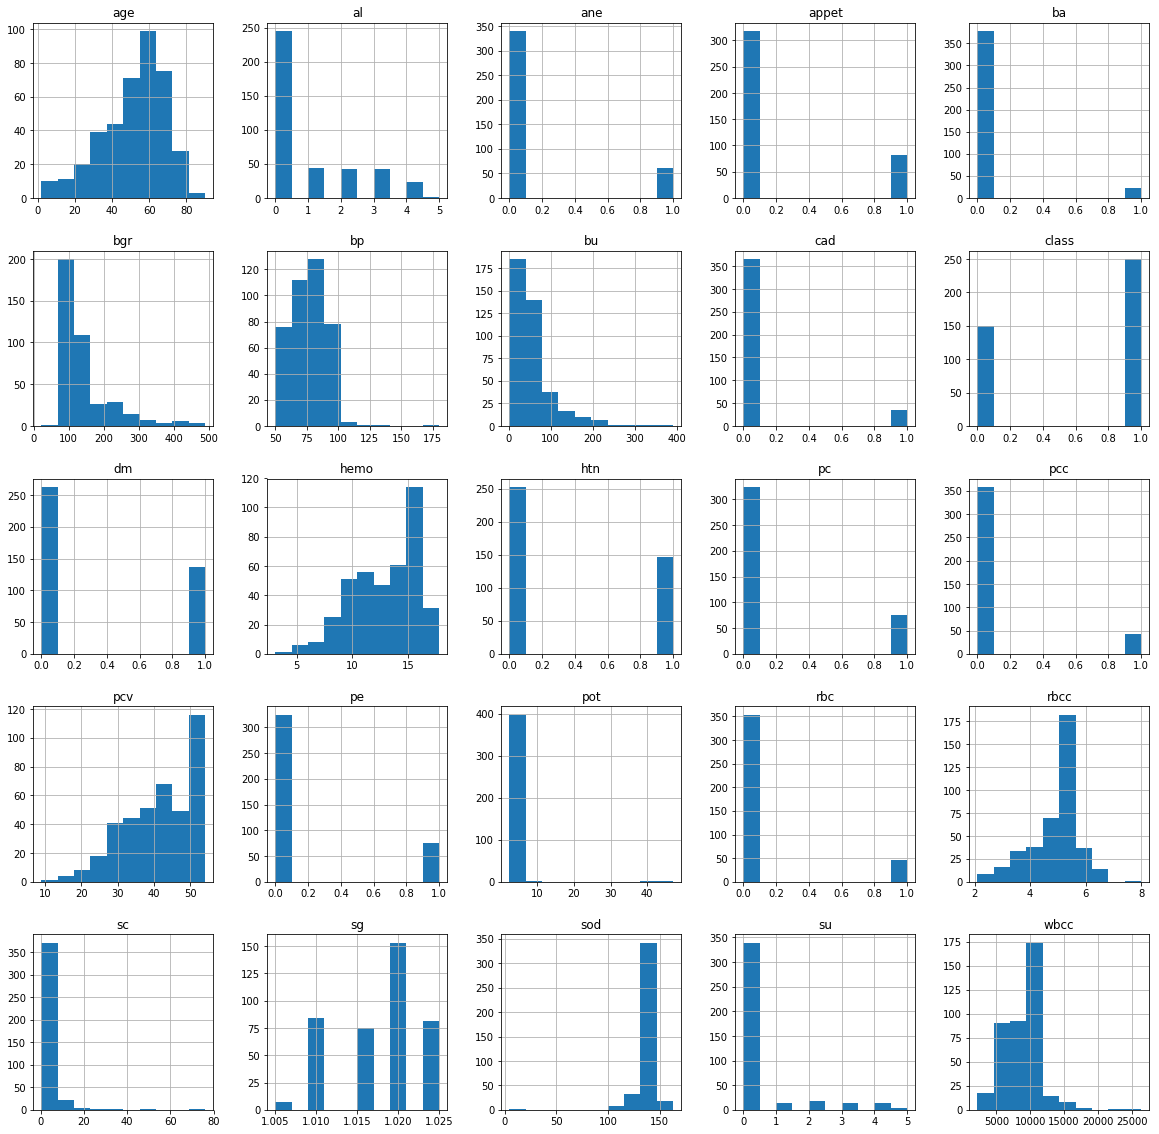

In [12]:
# plot histograms for each features
pdata.hist(figsize = (20,20))
plt.show()

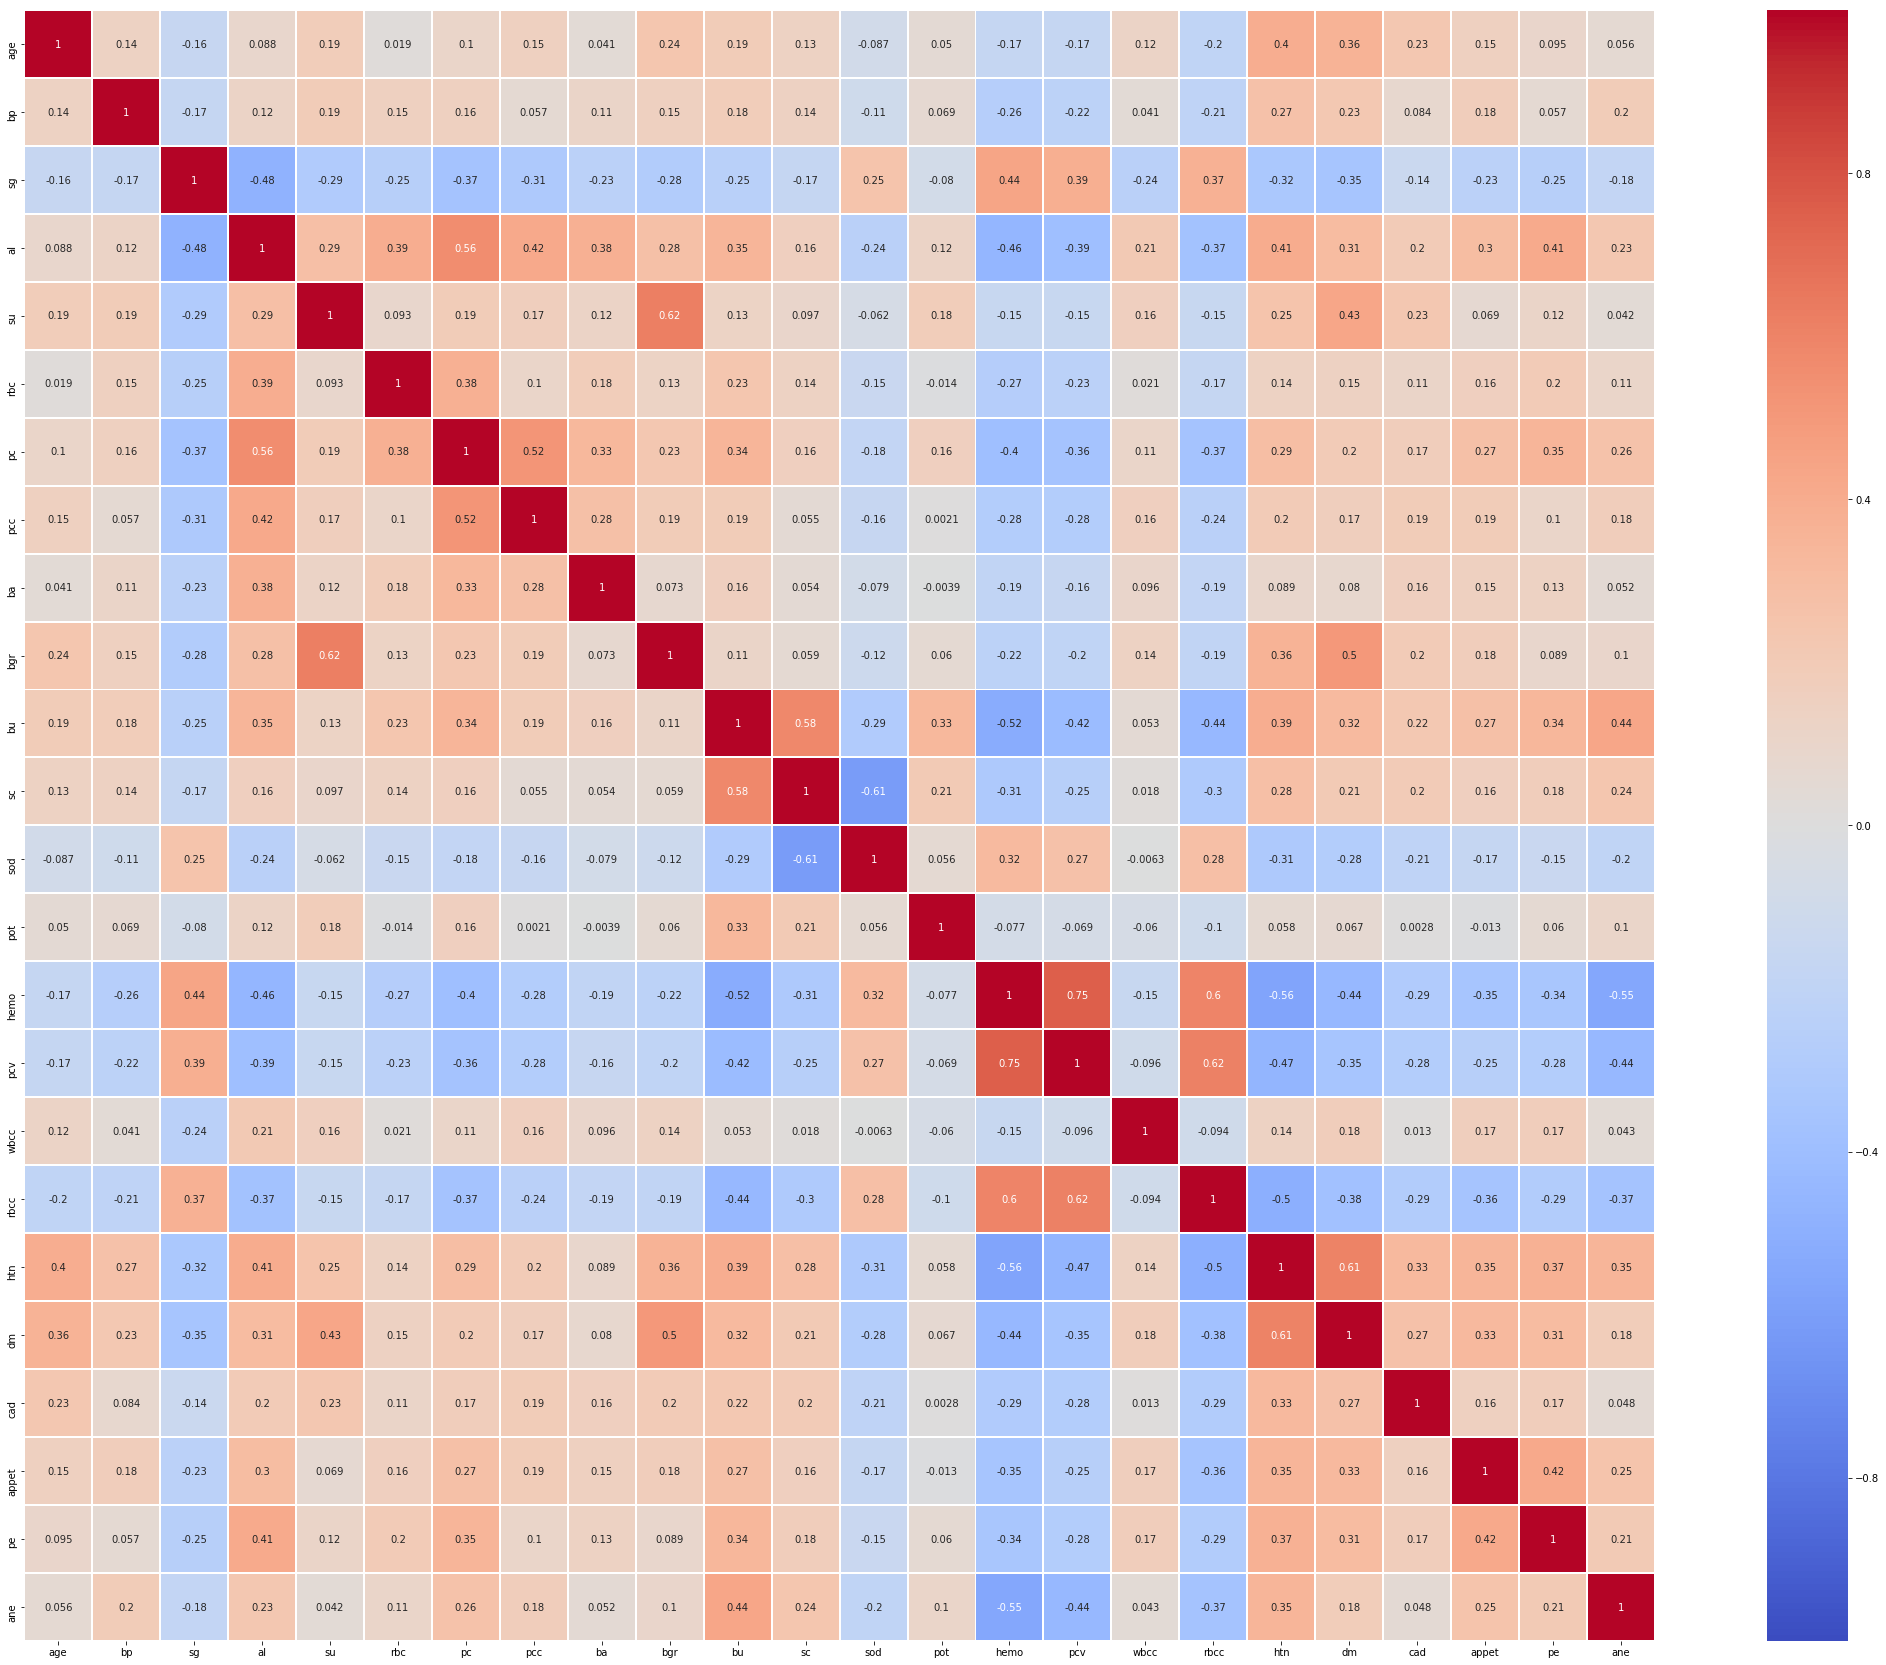

In [13]:
#correlation between the features
features=pdata.iloc[:,:24]
cor = features.corr()
plt.figure(figsize=(40,30))
sns.heatmap(cor,annot=True,linewidths=1,vmin=-1, vmax=1, center=0,
     cmap="coolwarm",square=True)

1.so here we can see sod(Sodium) vs sc(Serum Creatinine) and htn(Hypertension) vs hemo(Hemoglobin) has the highest negatively correlated value. 

2.On the other hand bgr(Blood Glucose Random) vs su(Sugar) also pcv(Packed Cell Volume) vs hemo(Hemoglobin) has the highest positively correlated value.

In [14]:
#sorted correlation
cor.unstack().sort_values().drop_duplicates()

sod    sc      -0.611418
hemo   htn     -0.564793
ane    hemo    -0.548475
hemo   bu      -0.515996
htn    rbcc    -0.500994
al     sg      -0.479962
pcv    htn     -0.466613
al     hemo    -0.458027
rbcc   bu      -0.444407
ane    pcv     -0.444377
hemo   dm      -0.442027
pcv    bu      -0.421288
pc     hemo    -0.398307
al     pcv     -0.393922
rbcc   dm      -0.382588
       al      -0.368210
ane    rbcc    -0.366149
rbcc   pc      -0.365479
sg     pc      -0.365353
pc     pcv     -0.360741
appet  rbcc    -0.358803
dm     sg      -0.351016
pcv    dm      -0.346144
hemo   appet   -0.345129
pe     hemo    -0.343058
htn    sg      -0.323643
sc     hemo    -0.311992
sod    htn     -0.306791
pcc    sg      -0.306426
sc     rbcc    -0.298676
                  ...   
bu     al       0.347441
htn    ane      0.347802
pc     pe       0.350227
htn    bgr      0.362851
age    dm       0.364892
pe     htn      0.371026
sg     rbcc     0.371683
rbc    pc       0.377394
al     ba       0.377935


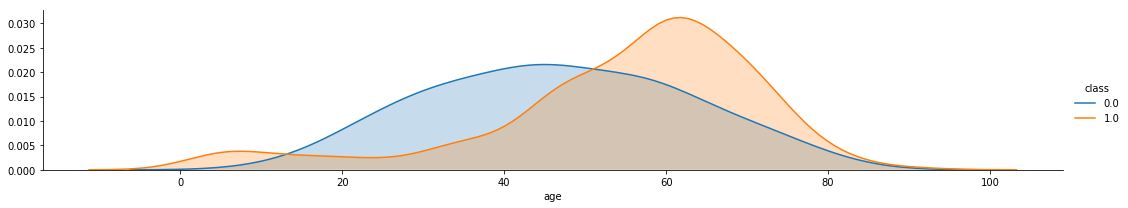

In [15]:
# age vs ckd
plot = sns.FacetGrid(pdata, hue='class',aspect=5)
plot.map(sns.kdeplot,'age', shade= True)
plot.add_legend()

# Data Scaling & PCA

In [16]:
from sklearn.preprocessing import StandardScaler
x = pdata['class']  #target class
y = pdata.drop('class', axis = 1) #all features

#scaling features with standardscaler
s=StandardScaler()
s.fit(y)
sdata=s.transform(y)
sdata


array([[-0.21616735,  0.25421378,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-2.62783036, -1.97247624,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.60732733,  0.25421378, -1.4210744 , ...,  1.96927621,
        -0.4843221 ,  2.38047614],
       ...,
       [-2.33372512,  0.25421378,  0.4214856 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [-2.03961987, -1.23024623,  1.3427656 , ..., -0.50780078,
        -0.4843221 , -0.42008403],
       [ 0.37204313,  0.25421378,  1.3427656 , ..., -0.50780078,
        -0.4843221 , -0.42008403]])

In [17]:
#dimension reduction with principal component analysis
from sklearn.decomposition import PCA
p = PCA(n_components=10)  # dimension reduce to 10 from 24
p.fit(sdata)
pca=p.transform(sdata)
print ("Before PCA \n",sdata.shape)
print("\nAfter PCA\n",pca.shape)
print("")
print (pca)

Before PCA 
 (400, 24)

After PCA
 (400, 10)

[[-0.67195079 -0.35601282  1.05623362 ...  0.25718172  0.06857534
   0.27450408]
 [-1.39212304  0.87812755 -1.82318505 ... -0.48442843 -2.7715975
  -0.49764309]
 [ 2.75358344 -2.22799263  1.61044654 ... -1.04298176 -1.16877617
   1.35431041]
 ...
 [-2.71832912  0.58084043 -0.55423415 ... -0.00389393 -0.38245861
   0.09832058]
 [-2.89133753  0.75904644 -0.41894562 ... -0.12762122 -1.17747151
   0.28347114]
 [-2.94414188 -0.28179735  0.33861871 ...  0.70038353  0.65855578
   0.84560582]]


In [18]:
# create X and Y datasets for training and testing
from sklearn import model_selection

x_train, x_test, y_train, y_test = model_selection.train_test_split(pca,x, test_size = 0.2)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(320, 10)
(320,)
(80, 10)
(80,)


# Random Forest Classifier

In [19]:
#Random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
rfc=RandomForestClassifier(n_estimators=30)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [20]:
rfc.score(x_test,y_test)

0.9875

# Results

In [21]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,classification_report
pre=rfc.predict(x_test)
print("Prediction accuracy results :")
print(accuracy_score(y_test,pre))
print(classification_report(y_test,pre))

Prediction accuracy results :
0.9875
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99        35
         1.0       0.98      1.00      0.99        45

   micro avg       0.99      0.99      0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



Text(24.0, 0.5, 'Truth')

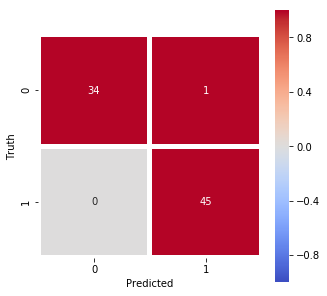

In [22]:
#model prediction result visualization with confusion matrix
cm=confusion_matrix(y_test,pre)
plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=4,vmin=-1, vmax=1, center=0,
    cmap="coolwarm",square=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Deep Learning Model

In [23]:
#Build and train the deep learning model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# define a function to build the keras model
def create_model():
    # create model
    model= Sequential()
    
    #first hidden layer
    model.add(Dense(16, input_dim=x_train.shape[1], kernel_initializer='normal', activation='sigmoid')) 
    
    #second hidden layer
    model.add(Dense(21, kernel_initializer='normal', activation='sigmoid'))
    
    #third hidden layer
    model.add(Dense(7, kernel_initializer='normal', activation='sigmoid'))
    
    #output layer
    model.add(Dense(1, activation='sigmoid'))
              
              
    # compile model
    model.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])
    return model
              
model = create_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                176       
_________________________________________________________________
dense_2 (Dense)              (None, 21)                357       
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 154       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 695
Trainable params: 695
Non-trainable params: 0
_________________________________________________________________
None


In [24]:
#model fitting
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose = 1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
320/320 [==============================] - 4s 11ms/step - loss: 1.0836 - acc: 0.3594
Epoch 2/100
320/320 [==============================] - 1s 2ms/step - loss: 0.8737 - acc: 0.3594
Epoch 3/100
320/320 [==============================] - 3s 9ms/step - loss: 0.7428 - acc: 0.3594
Epoch 4/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6802 - acc: 0.5906
Epoch 5/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6520 - acc: 0.6406
Epoch 6/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6400 - acc: 0.6406
Epoch 7/100
320/320 [==============================] - 1s 2ms/step - loss: 0.6321 - acc: 0.6406
Epoch 8/100
320/320 [==============================] - 1s 3ms/step - loss: 0.6261 - acc: 0.6406
Epoch 9/100
320/320 [==============================] - 0s 1ms/step - loss: 0.6210 - acc: 0.6406
Epoch 10/100
320/320 [==============================] - 0s 1ms/step - loss: 0.6163 - ac

320/320 [==============================] - 0s 575us/step - loss: 0.0882 - acc: 0.9875
Epoch 83/100
320/320 [==============================] - 0s 566us/step - loss: 0.0858 - acc: 0.9906
Epoch 84/100
320/320 [==============================] - 0s 480us/step - loss: 0.0838 - acc: 0.9875
Epoch 85/100
320/320 [==============================] - 0s 507us/step - loss: 0.0815 - acc: 0.9875
Epoch 86/100
320/320 [==============================] - 0s 502us/step - loss: 0.0800 - acc: 0.9875
Epoch 87/100
320/320 [==============================] - 0s 574us/step - loss: 0.0777 - acc: 0.9906
Epoch 88/100
320/320 [==============================] - 1s 2ms/step - loss: 0.0758 - acc: 0.9875
Epoch 89/100
320/320 [==============================] - 1s 2ms/step - loss: 0.0742 - acc: 0.9875
Epoch 90/100
320/320 [==============================] - 0s 1ms/step - loss: 0.0725 - acc: 0.9875
Epoch 91/100
320/320 [==============================] - 6s 19ms/step - loss: 0.0714 - acc: 0.9906
Epoch 92/100
320/320 [========

# Results

In [25]:
# generate classification report using predictions for categorical model
from sklearn.metrics import classification_report, accuracy_score

pre2=np.round(model.predict(x_test)).astype(int)

print("Prediction accuracy results :")
print(accuracy_score(y_test,pre2))
print(classification_report(y_test,pre2))

Prediction accuracy results :
1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        35
         1.0       1.00      1.00      1.00        45

   micro avg       1.00      1.00      1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



Text(24.0, 0.5, 'Truth')

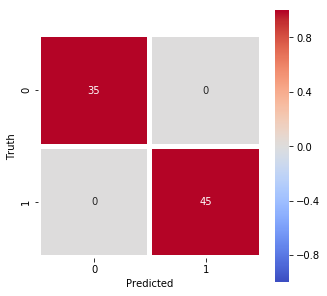

In [26]:
cm2=confusion_matrix(y_test,pre2)
plt.figure(figsize=(5,5))
sns.heatmap(cm2,annot=True,linewidths=4,vmin=-1, vmax=1, center=0,
    cmap="coolwarm",square=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

So,In conclusion deep learning model using keras library shown better result than Random Forest Classifier algorithm.